# Objectives:
- Understanding the classic MNIST problem
- Create a deep neural network that performs multi-class classification
- Tune the dnn

## The Dataset
- The MNIST training set contains 60,000 examples
- The MNIST test set contains 10,000 examples
<br>

Each example contains a pixel map showing how a person wrote a digit. For example, the following image shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after input data is normalized).
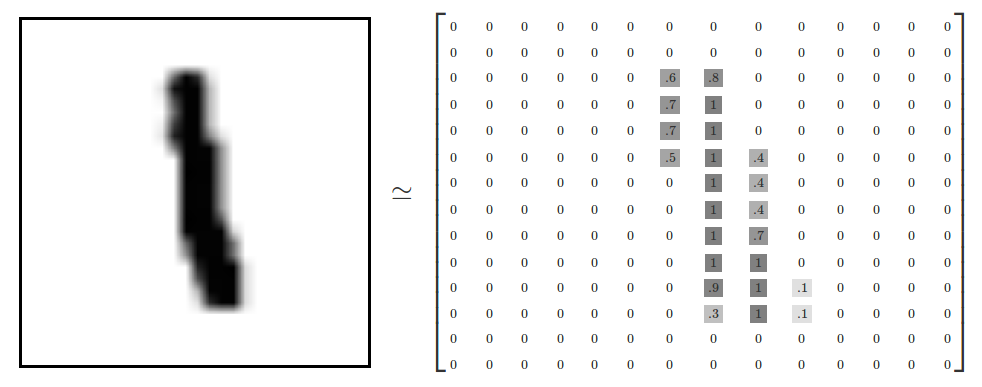

Each example in the MNIST dataset consists of:
- A label specified by a rater. Each label must be an integer from 0 to 9. For example, in the image, the rater would almost certainly assign the label `1` to the example.
- A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.
<br>
This is a multi-class classification problem with 10 output classes.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

np.set_printoptions(linewidth=200)

2022-10-26 10:47:03.053413: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-26 10:47:03.278091: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-26 10:47:03.343382: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-26 10:47:03.343413: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

## Load dataset

tf.keras provides a set of convenience functions for loading well known datasets. Each of these convenience functions does the following:
- Loads both the training set and the test set
- Separates each set into features and labels
<br>

The relavant convenience function for MNIST is called `mnist.load_data()`

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## View the dataset
The `.csv` file for MNIST does not contain column names. We use ordinal numbers to access different subsets of the MNIST dataset. It is probably best to think of `x_train` and `x_test` as 3d NumPy arrays

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  94, 163,  99, 228, 255, 202,  49,  58,  47,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 171, 245, 253, 253, 253, 254, 221, 236, 174, 173

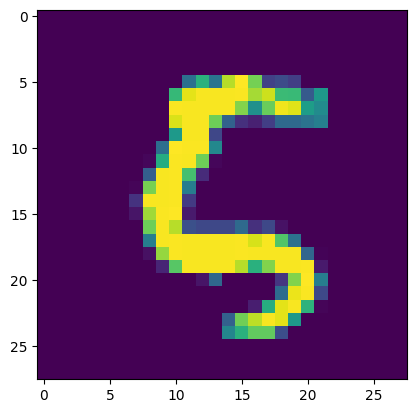

In [12]:
plt.imshow(x_train[2000])
x_train[2000]

In [13]:
x_train[2000][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  92, 255, 254, 254, 119,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [17]:
x_train[2000][10][12]

254

## Normalize feature values

In [19]:
x_train_normalized = x_train / 255.0
x_test_normalized = x_test / 255.0
print(x_train_normalized[2000][10])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.36078431 1.         0.99607843 0.99607843 0.46666667 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


## Create, train & plot functions

In [91]:
def plot_curve(epochs, hist, list_of_metrics):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    
    for m in list_of_metrics:
        x = hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
        
    plt.legend()
    
print("Loaded the plot_curve function.")

def create_model(my_learning_rate):

    model = tf.keras.models.Sequential()


    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    #model.add(tf.keras.layers.Dense(units=256, activation='relu'))
    model.add(tf.keras.layers.Dense(units=128, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.2))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))     
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
    history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    return epochs, hist   

print("Loaded the create_model and train_modell functions.")

Loaded the plot_curve function.
Loaded the create_model and train_modell functions.


## Create, train, plot & test

Epoch 1/50
12/12 [==============================] - 0s 21ms/step - loss: 1.0322 - accuracy: 0.6944 - val_loss: 0.3469 - val_accuracy: 0.9008
Epoch 2/50
12/12 [==============================] - 0s 14ms/step - loss: 0.3614 - accuracy: 0.8920 - val_loss: 0.2450 - val_accuracy: 0.9298
Epoch 3/50
12/12 [==============================] - 0s 14ms/step - loss: 0.2540 - accuracy: 0.9275 - val_loss: 0.1871 - val_accuracy: 0.9443
Epoch 4/50
12/12 [==============================] - 0s 14ms/step - loss: 0.1961 - accuracy: 0.9414 - val_loss: 0.1595 - val_accuracy: 0.9527
Epoch 5/50
12/12 [==============================] - 0s 15ms/step - loss: 0.1604 - accuracy: 0.9532 - val_loss: 0.1365 - val_accuracy: 0.9615
Epoch 6/50
12/12 [==============================] - 0s 14ms/step - loss: 0.1344 - accuracy: 0.9608 - val_loss: 0.1242 - val_accuracy: 0.9647
Epoch 7/50
12/12 [==============================] - 0s 14ms/step - loss: 0.1136 - accuracy: 0.9667 - val_loss: 0.1145 - val_accuracy: 0.9670
Epoch 8/50
12

[0.08586077392101288, 0.9803000092506409]

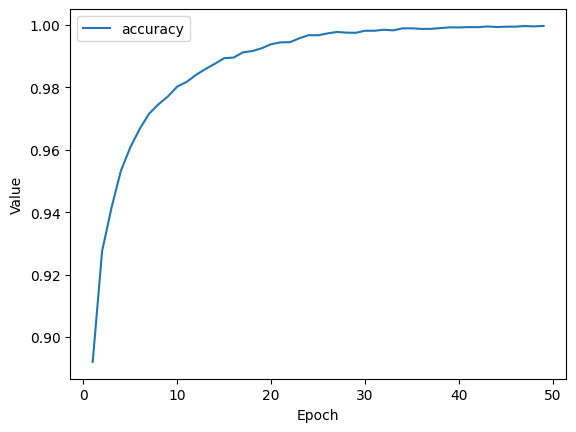

In [92]:
learning_rate = 0.003
epochs = 50
batch_size = 4000
validation_split = 0.2

my_model = create_model(learning_rate)

epochs, hist = train_model(my_model, x_train_normalized, y_train,
                          epochs, batch_size, validation_split)

list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)


## Optimization

1. Adding more nodes to the layers improved the accuracy
2. Adding hidden layer improved accuracy
3. Setting the dropout rate to  around 0.5 improved the accuracy